# Neural Network from Scratch in TensorFlow

# Task 1: Introduction and Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.7.0


# Task 2: Initializing Neural Network

In [2]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        
        # Initalize weights
        for i in range(1, self.L):
            #Xavier Initialziation
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i-1])) * np.sqrt(2 / self.layers[0]))
            #self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i], self.layers[i-1]))) #Wx+b
            self.b[i] = tf.Variable(tf.ones(shape=(self.layers[i],1))) #b
        
    def forward_pass(self, X):
        A = tf.convert_to_tensor(X, dtype=tf.float32) #Get input to work with tf
        for i in range(1, self.L):
            Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            #activation
            if i!= self.L-1:
                A = tf.nn.relu(Z)
            else:
                #final layer activation, in this case nothing happens
                A=Z
        return A
    
    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
        return tf.reduce_mean(loss)
    
    def update_params(self, lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr*self.dW[i])
            self.b[i].assign_sub(lr*self.db[i])
            
    def predict(self, X):
        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)
        
    def train_on_batch(self, X, Y, lr):
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        Y = tf.convert_to_tensor(Y, dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)
        
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
        del tape
        self.update_params(lr)
        return loss.numpy() 
    
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):
        # Your code here
        history = {
            'val_loss': [], 
            'train_loss': [],
            'val_acc': []
        }
        
        for e in range(epochs):
            epoch_train_loss = 0
            print(f'Epoch {e}', end='.')
            for i in range(steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss += batch_loss
                
                if i%int(np.ceil(steps_per_epoch/10)) == 0:
                    print(end='.')
                    
            history['train_loss'] = epoch_train_loss
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'] = val_loss
            val_preds = self.predict(x_test)
            val_acc = np.mean(val_preds.numpy() == np.argmax(y_test, axis=1))
            history['val_acc'] = val_acc
            print('val acc:', val_acc)
        return history

# Task 3: Forward Pass

In [257]:
class NeuralNetwork(NeuralNetwork):
    def forward_pass(self, X):
        A = tf.convert_to_tensor(X, dtype=tf.float32) #Get input to work with tf
        for i in range(1, self.L):
            Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            #activation
            if i!= self.L-1:
                A = tf.nn.relu(Z)
            else:
                A=Z
        return A
        
        

# Task 4: Computing Loss and Updating Parameters

In [258]:
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
        return tf.reduce_mean(loss)
    
    def update_params(self, lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr*self.dW[i])
            self.b[i].assign_sub(lr*self.db[i])

# Task 5: Predict and Info Functions

In [259]:
class NeuralNetwork(NeuralNetwork):
    def predict(self, X):
        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)

# Task 6: Training on Batch

In [260]:
class NeuralNetwork(NeuralNetwork):
    def train_on_batch(self, X, Y, lr):
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        Y = tf.convert_to_tensor(Y, dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)
        
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
        del tape
        self.update_params(lr)
        return loss.numpy() 

# Task 7: Training on Complete Set

In [261]:
class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):
        # Your code here
        history = {
            'val_loss': [], 
            'train_loss': [],
            'val_acc': []
        }
        
        for e in range(epochs):
            epoch_train_loss = 0
            print(f'Epoch {e}', end='.')
            for i in range(steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss += batch_loss
                
                if i%int(np.ceil(steps_per_epoch/10)) == 0:
                    print(end='.')
                    
            history['train_loss'] = epoch_train_loss
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'] = val_loss
            val_preds = self.predict(x_test)
            val_acc = np.mean(val_preds.numpy() == np.argmax(y_test, axis=1))
            history['val_acc'] = val_acc
            print('val acc:', val_acc)
        return history
        

# Task 8: Application

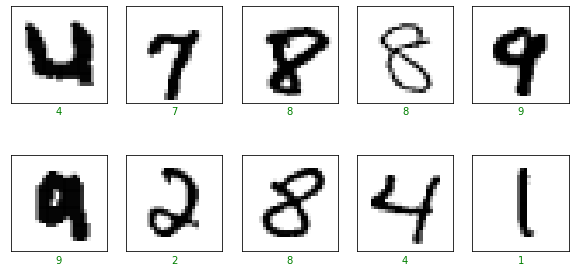

In [3]:
(x_train, y_train), (x_test, y_test) = nn_utils.load_data()
nn_utils.plot_random_examples(x_train, y_train).show()

In [10]:
net = NeuralNetwork([784,128,128,10])

In [11]:
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [12]:
batch_size = 10000
epochs = 100
steps_per_epoch = int(np.ceil(x_train.shape[0]/ batch_size))
lr = 0.1

In [13]:
x_train.shape, 

((60000, 784),)

In [14]:
net.train(
    x_train, y_train,
    x_test, y_test,
    epochs, steps_per_epoch, 
    batch_size, lr
    
)

Epoch 0.

2022-01-07 15:02:39.106866: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-01-07 15:02:39.106928: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:442 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Attempting to perform BLAS operation using StreamExecutor without BLAS support [Op:MatMul]

In [220]:
np.mean(net.predict(x_test) == np.argmax(y_test,axis=1))

0.9372

# Task 9: Results